# 📊 Chapter 04: scikit-learn - Machine Learning with Multiple Datasets

## 🎯 Learning Objectives
By the end of this chapter, you will:
- ✅ Understand scikit-learn's estimator API and workflow
- ✅ Build classification models (predict categories)
- ✅ Build regression models (predict numbers)
- ✅ Apply ML techniques on **3 different datasets**
- ✅ Evaluate model performance with metrics
- ✅ Perform cross-validation and hyperparameter tuning

---

## 📁 Datasets Used

### 1️⃣ Iris Flowers (Classification)
**Purpose**: Classify flower species
- 150 samples, 4 features
- 3 classes (Setosa, Versicolor, Virginica)

### 2️⃣ Wine Quality (Classification)
**Purpose**: Classify wine types
- 178 samples, 13 features
- 3 classes of wine

### 3️⃣ California Housing (Regression)
**Purpose**: Predict house prices
- 20,640 samples, 8 features
- Continuous target (price)

**Why 3 datasets?** Practice both classification AND regression!

---

## 📚 Table of Contents
**0.5. [scikit-learn Basics - Essential ML Concepts](#sklearn-basics)** ⭐ **Start Here! Learn ML concepts BEFORE building models**
1. [Introduction to scikit-learn](#intro)
2. [Loading Datasets](#loading)
3. [Train/Test Split](#split)
4. [Data Preprocessing](#preprocessing)
5. [Classification Models](#classification)
6. [Regression Models](#regression)
7. [Model Evaluation](#evaluation)
8. [Cross-Validation](#cv)
9. [Pipelines](#pipelines)
10. [Practice Exercises](#exercises)
11. [Next Steps: Projects](#projects)

💡 **Tip for Beginners**: Section 0.5 teaches you train_test_split, StandardScaler, fit/predict, cross-validation, and more BEFORE we build models. Don't skip it!

In [15]:
# Import core scikit-learn modules
# sklearn.datasets - Built-in datasets for practice
from sklearn.datasets import load_iris, load_wine, fetch_california_housing

# sklearn.model_selection - Train/test split, cross-validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# sklearn.preprocessing - Data scaling and transformation
from sklearn.preprocessing import StandardScaler, LabelEncoder

# sklearn.linear_model - Linear models (Linear Regression, Logistic Regression)
from sklearn.linear_model import LinearRegression, LogisticRegression

# sklearn.ensemble - Ensemble methods (Random Forest, Gradient Boosting)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# sklearn.metrics - Model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# sklearn.pipeline - Creating ML pipelines
from sklearn.pipeline import Pipeline

# Import supporting libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical plots

# Set random seed for reproducibility
# This ensures we get same results every time we run the code
np.random.seed(42)

# Check versions
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print("\n✅ All libraries imported successfully!")
print("\n🎯 Ready to build machine learning models!")

scikit-learn version: 1.7.2
NumPy version: 2.3.1
pandas version: 2.3.0

✅ All libraries imported successfully!

🎯 Ready to build machine learning models!


---
<a id="sklearn-basics"></a>
## 0.5 scikit-learn Basics - Essential ML Concepts 🔑

**⚠️ CRITICAL FOR BEGINNERS**: This section introduces ALL fundamental machine learning concepts **BEFORE** we build models. Don't skip this - it's the foundation for everything that follows!

---

### 📌 Concept 1: Features (X) and Target (y)

In machine learning, we have two types of data:

**Features (X)** - Input variables (predictors, independent variables):
- These are the measurements or characteristics we know
- Always a 2D array: shape `(n_samples, n_features)`
- Example: Height, weight, age → predict diabetes
- Convention: Capital `X`

**Target (y)** - Output variable (label, dependent variable):
- This is what we want to predict
- Always a 1D array: shape `(n_samples,)`
- Example: Disease presence (yes/no), house price ($)
- Convention: Lowercase `y`

**Example:**
```python
# Predicting flower species
X = [[5.1, 3.5, 1.4, 0.2],  # Sample 1: 4 features
     [4.9, 3.0, 1.4, 0.2],  # Sample 2: 4 features
     [6.3, 2.5, 5.0, 1.9]]  # Sample 3: 4 features
# X.shape = (3, 4) → 3 samples, 4 features

y = [0, 0, 2]  # Species: setosa, setosa, virginica
# y.shape = (3,) → 3 labels
```

---

### 📌 Concept 2: Classification vs Regression

Two main types of machine learning problems:

| Type | Target Variable | Example | Algorithms |
|------|----------------|---------|------------|
| **Classification** | **Categorical** (discrete classes) | Spam/Not spam<br>Dog/Cat/Bird<br>Survived/Died | Logistic Regression<br>Random Forest Classifier<br>SVM |
| **Regression** | **Continuous** (numbers) | House price ($)<br>Temperature (°C)<br>Stock price | Linear Regression<br>Random Forest Regressor<br>Neural Networks |

**How to tell:**
- Can you list all possible values? → **Classification**
- Is it a number on a continuous scale? → **Regression**

---

### 📌 Concept 3: Train/Test Split

**Why split data?**
- **Training set**: Model learns patterns from this data
- **Test set**: Model evaluated on unseen data (measures real-world performance)
- **Never test on training data!** Model will just memorize, not learn

**Common split ratios:**
- 80% train, 20% test (most common)
- 70% train, 30% test
- 90% train, 10% test (if data is large)

**How to split:**
```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42     # For reproducibility
)
```

**Understanding the output:**
- `X_train`: Training features (80% of data)
- `X_test`: Test features (20% of data)
- `y_train`: Training labels (80% of data)
- `y_test`: Test labels (20% of data)

**Random state:**
- `random_state=42` ensures same split every time (reproducible results)
- Without it, split is different each run

---

### 📌 Concept 4: Data Preprocessing - Scaling

**Why scale features?**
- Features often have different ranges: Age (0-100) vs Income (0-1,000,000)
- Many ML algorithms (SVM, Neural Networks, KNN) perform poorly with different scales
- Scaling puts all features on same scale (usually 0-1 or mean=0, std=1)

**Common scaling methods:**

| Method | Formula | Range | Use when |
|--------|---------|-------|----------|
| **StandardScaler** | `(x - mean) / std` | Mean=0, Std=1 | Default choice, data is normally distributed |
| **MinMaxScaler** | `(x - min) / (max - min)` | [0, 1] | Data has clear min/max bounds |
| **RobustScaler** | Uses median/IQR | No fixed range | Data has outliers |

**How to scale:**
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test_scaled = scaler.transform(X_test)        # Transform test (using train stats)
```

**CRITICAL: fit on train, transform on test!**
- `fit_transform()` on training data → learns mean/std from training data
- `transform()` on test data → uses training mean/std (not test mean/std!)
- This prevents data leakage from test set

---

### 📌 Concept 5: The scikit-learn API - fit, predict, score

**All scikit-learn estimators follow the same pattern:**

#### 1. **Create model** (instantiate estimator)
```python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()  # Create model with default parameters
```

#### 2. **Train model** (fit on training data)
```python
model.fit(X_train, y_train)  # Model learns from training data
```

#### 3. **Make predictions** (predict on new data)
```python
y_pred = model.predict(X_test)  # Predict labels for test data
```

#### 4. **Evaluate model** (score or metrics)
```python
accuracy = model.score(X_test, y_test)  # Returns accuracy for classifiers
```

**Key methods:**

| Method | Purpose | Example |
|--------|---------|---------|
| `.fit(X, y)` | Train model | `model.fit(X_train, y_train)` |
| `.predict(X)` | Make predictions | `y_pred = model.predict(X_test)` |
| `.score(X, y)` | Evaluate model | `accuracy = model.score(X_test, y_test)` |
| `.predict_proba(X)` | Class probabilities (classifiers) | `probs = model.predict_proba(X_test)` |

---

### 📌 Concept 6: Model Evaluation Metrics

**Classification metrics:**

| Metric | What it measures | Range | Higher = Better? |
|--------|-----------------|-------|------------------|
| **Accuracy** | % correct predictions | 0-1 (or 0-100%) | ✅ Yes |
| **Precision** | Of predicted positives, % actually positive | 0-1 | ✅ Yes |
| **Recall** | Of actual positives, % predicted positive | 0-1 | ✅ Yes |
| **F1-Score** | Harmonic mean of precision & recall | 0-1 | ✅ Yes |

```python
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
```

**Regression metrics:**

| Metric | What it measures | Range | Lower = Better? |
|--------|-----------------|-------|-----------------|
| **MSE** (Mean Squared Error) | Average squared error | 0-∞ | ✅ Yes |
| **RMSE** (Root MSE) | Average error in original units | 0-∞ | ✅ Yes |
| **MAE** (Mean Absolute Error) | Average absolute error | 0-∞ | ✅ Yes |
| **R² Score** | % variance explained | -∞ to 1 | ❌ No (higher is better) |

```python
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False → RMSE
r2 = r2_score(y_test, y_pred)
```

---

### 📌 Concept 7: Cross-Validation

**Problem with single train/test split:**
- Results depend on which data points ended up in train vs test
- One "lucky" split might give misleadingly good results

**Solution: K-Fold Cross-Validation**

**How it works:**
1. Split data into K folds (usually K=5 or K=10)
2. Train on K-1 folds, test on remaining fold
3. Repeat K times (each fold gets to be test set once)
4. Average results from all K iterations

**Example: 5-Fold CV**
```
Iteration 1: Train [2,3,4,5], Test [1]
Iteration 2: Train [1,3,4,5], Test [2]
Iteration 3: Train [1,2,4,5], Test [3]
Iteration 4: Train [1,2,3,5], Test [4]
Iteration 5: Train [1,2,3,4], Test [5]
```

**How to use:**
```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold CV
print(f"Average accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")
```

**Benefits:**
- More reliable performance estimate
- Uses all data for both training and testing
- Shows variance in model performance

---

### 📌 Concept 8: Hyperparameter Tuning

**Hyperparameters** = Settings you choose **before** training:
- NOT learned from data
- Examples: Number of trees in Random Forest, learning rate, max depth

**Problem:** Wrong hyperparameters → poor performance

**Solution: Grid Search**

**How it works:**
1. Define grid of hyperparameter values to try
2. Try every combination using cross-validation
3. Return best combination

**Example:**
```python
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],      # 3 values
    'max_depth': [None, 10, 20]         # 3 values
}
# Total: 3 × 3 = 9 combinations

# Create grid search
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters
print(grid.best_params_)
print(grid.best_score_)
```

---

### 📌 Concept 9: Pipelines

**Problem:** Many steps to remember:
1. Scale data
2. Train model
3. Don't forget to scale test data the same way!

**Solution: Pipeline** (automates the workflow)

**How it works:**
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Step 1: Scale
    ('classifier', LogisticRegression())  # Step 2: Classify
])

# Train (automatically scales then trains)
pipeline.fit(X_train, y_train)

# Predict (automatically scales then predicts)
y_pred = pipeline.predict(X_test)
```

**Benefits:**
- Less code, fewer bugs
- Prevents data leakage (can't forget to scale test data)
- Easy to use with GridSearchCV

---

### 🎯 Quick Reference Summary

| Concept | Code Example |
|---------|-------------|
| **Train/test split** | `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)` |
| **Scale data** | `scaler = StandardScaler()`<br>`X_scaled = scaler.fit_transform(X_train)` |
| **Create model** | `model = LogisticRegression()` |
| **Train model** | `model.fit(X_train, y_train)` |
| **Make predictions** | `y_pred = model.predict(X_test)` |
| **Evaluate** | `accuracy = model.score(X_test, y_test)` |
| **Cross-validation** | `scores = cross_val_score(model, X, y, cv=5)` |
| **Grid search** | `grid = GridSearchCV(model, param_grid, cv=5)`<br>`grid.fit(X_train, y_train)` |
| **Pipeline** | `pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])` |

---

### 💡 Why This Section Matters

In the sections that follow, you'll see code like:
- `train_test_split(X, y, test_size=0.2)` → Now you know this splits data 80/20!
- `scaler.fit_transform(X_train)` → Now you know this learns from and transforms training data!
- `model.fit(X_train, y_train)` → Now you know this trains the model!
- `model.predict(X_test)` → Now you know this makes predictions on new data!
- `cross_val_score(model, X, y, cv=5)` → Now you know this does 5-fold cross-validation!

**✅ You're now ready to build machine learning models!** Let's practice these concepts below.

In [16]:
# ============================================================================
# HANDS-ON PRACTICE: scikit-learn & ML Basics
# ============================================================================

print("=" * 80)
print("SCIKIT-LEARN & MACHINE LEARNING BASICS - HANDS-ON PRACTICE")
print("=" * 80)

# ============================================================================
# PRACTICE 1: Features (X) and Target (y)
# ============================================================================
print("\n📌 PRACTICE 1: Understanding Features (X) and Target (y)")
print("-" * 80)

# Create sample data
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4, n_informative=3,
                           n_redundant=1, random_state=42)

print(f"Features (X) shape: {X.shape}")
print(f"  → {X.shape[0]} samples (rows)")
print(f"  → {X.shape[1]} features (columns)")
print(f"\nTarget (y) shape: {y.shape}")
print(f"  → {y.shape[0]} labels (one per sample)")
print(f"\nFirst 3 samples:")
print(f"X[0:3] = \n{X[0:3]}")
print(f"y[0:3] = {y[0:3]}")
print(f"\n✅ X is 2D (samples × features), y is 1D (labels)")

# ============================================================================
# PRACTICE 2: Classification vs Regression
# ============================================================================
print("\n\n📌 PRACTICE 2: Classification vs Regression")
print("-" * 80)

# Classification: Categorical target
from sklearn.datasets import make_classification
X_class, y_class = make_classification(n_samples=50, n_classes=3, n_informative=3, 
                                       n_redundant=0, random_state=42)

print("CLASSIFICATION: Predicting categories")
print(f"Target values (first 10): {y_class[:10]}")
print(f"Unique classes: {np.unique(y_class)}")  # [0, 1, 2]
print("Example: Predicting flower species (Setosa, Versicolor, Virginica)")

# Regression: Continuous target
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=50, n_features=3, noise=10, random_state=42)

print("\n\nREGRESSION: Predicting numbers")
print(f"Target values (first 10): {y_reg[:10].round(2)}")
print(f"Range: {y_reg.min():.2f} to {y_reg.max():.2f}")
print("Example: Predicting house prices ($100,000 to $500,000)")

print("\n✅ Classification → Categories (0, 1, 2)")
print("✅ Regression → Continuous numbers (123.45, -67.89)")

# ============================================================================
# PRACTICE 3: Train/Test Split
# ============================================================================
print("\n\n📌 PRACTICE 3: Train/Test Split")
print("-" * 80)

# Create sample data
X = np.random.rand(100, 4)  # 100 samples, 4 features
y = np.random.randint(0, 2, 100)  # Binary classification

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                     random_state=42)

print(f"Original data: {X.shape[0]} samples")
print(f"\nAfter split:")
print(f"  X_train shape: {X_train.shape} (80% = {X_train.shape[0]} samples)")
print(f"  X_test shape:  {X_test.shape} (20% = {X_test.shape[0]} samples)")
print(f"  y_train shape: {y_train.shape}")
print(f"  y_test shape:  {y_test.shape}")
print(f"\n✅ Train on 80%, Test on 20% (never test on training data!)")

# Test reproducibility
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, 
                                                         random_state=42)
print(f"\nWith same random_state=42:")
print(f"  Are splits identical? {np.array_equal(X_train, X_train2)}")

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, 
                                                         random_state=99)
print(f"\nWith different random_state=99:")
print(f"  Are splits identical? {np.array_equal(X_train, X_train3)}")

# ============================================================================
# PRACTICE 4: Data Scaling with StandardScaler
# ============================================================================
print("\n\n📌 PRACTICE 4: Data Scaling with StandardScaler")
print("-" * 80)

# Create data with different scales
data_unscaled = np.array([
    [1, 1000, 0.5],      # Feature 1: 0-10, Feature 2: 1000-10000, Feature 3: 0-1
    [5, 5000, 0.7],
    [10, 10000, 0.9]
])

print("BEFORE scaling:")
print(data_unscaled)
print(f"\nFeature 1 range: {data_unscaled[:, 0].min()} to {data_unscaled[:, 0].max()}")
print(f"Feature 2 range: {data_unscaled[:, 1].min()} to {data_unscaled[:, 1].max()}")
print(f"Feature 3 range: {data_unscaled[:, 2].min():.1f} to {data_unscaled[:, 2].max():.1f}")

# Scale
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_unscaled)

print("\n\nAFTER StandardScaler:")
print(data_scaled.round(3))
print(f"\nAll features now have:")
print(f"  Mean ≈ 0: {data_scaled.mean(axis=0).round(10)}")
print(f"  Std ≈ 1:  {data_scaled.std(axis=0).round(3)}")
print("\n✅ StandardScaler: (x - mean) / std → Mean=0, Std=1")

# ============================================================================
# PRACTICE 5: fit_transform vs transform
# ============================================================================
print("\n\n📌 PRACTICE 5: fit_transform vs transform (CRITICAL!)")
print("-" * 80)

# Simulate train/test split
X_train = np.array([[1], [2], [3], [4], [5]])
X_test = np.array([[6], [7]])

scaler = StandardScaler()

# CORRECT: fit_transform on train, transform on test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("CORRECT approach:")
print(f"X_train (original): {X_train.ravel()}")
print(f"X_train (scaled):   {X_train_scaled.ravel().round(3)}")
print(f"  → fit_transform() learns mean={scaler.mean_[0]:.1f}, std={scaler.scale_[0]:.2f}")

print(f"\nX_test (original): {X_test.ravel()}")
print(f"X_test (scaled):   {X_test_scaled.ravel().round(3)}")
print(f"  → transform() uses training mean={scaler.mean_[0]:.1f}, std={scaler.scale_[0]:.2f}")

# WRONG: fit_transform on test
scaler_wrong = StandardScaler()
X_test_wrong = scaler_wrong.fit_transform(X_test)
print(f"\n\n❌ WRONG: fit_transform on test")
print(f"X_test (scaled wrong): {X_test_wrong.ravel().round(3)}")
print(f"  → Uses test mean={scaler_wrong.mean_[0]:.1f}, std={scaler_wrong.scale_[0]:.2f}")
print(f"  → This is DATA LEAKAGE! Never fit on test data!")

print("\n\n✅ RULE: fit_transform(train), transform(test)")

# ============================================================================
# PRACTICE 6: The scikit-learn API - fit, predict, score
# ============================================================================
print("\n\n📌 PRACTICE 6: scikit-learn API - fit, predict, score")
print("-" * 80)

# Create simple classification data
X_simple = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y_simple = np.array([0, 0, 0, 1, 1, 1])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, 
                                                     test_size=0.33, random_state=42)

# Step 1: Create model
model = LogisticRegression()
print("Step 1: CREATE model")
print(f"  model = LogisticRegression()")

# Step 2: Train model
print("\nStep 2: TRAIN model (fit)")
model.fit(X_train, y_train)
print(f"  model.fit(X_train, y_train)")
print(f"  → Model learned from {X_train.shape[0]} training samples")

# Step 3: Make predictions
print("\nStep 3: PREDICT on new data")
y_pred = model.predict(X_test)
print(f"  y_pred = model.predict(X_test)")
print(f"  → Predictions: {y_pred}")
print(f"  → Actual:      {y_test}")

# Step 4: Evaluate
print("\nStep 4: EVALUATE model (score)")
accuracy = model.score(X_test, y_test)
print(f"  accuracy = model.score(X_test, y_test)")
print(f"  → Accuracy: {accuracy:.2%}")

print("\n✅ All scikit-learn models: CREATE → FIT → PREDICT → SCORE")

# ============================================================================
# PRACTICE 7: Classification Metrics
# ============================================================================
print("\n\n📌 PRACTICE 7: Classification Metrics")
print("-" * 80)

# Simulate predictions
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1])
y_pred = np.array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print("True labels:      ", y_true)
print("Predicted labels: ", y_pred)
print(f"\nAccuracy: {accuracy:.2%}")
print(f"  → {int(accuracy*10)} out of 10 predictions correct")

print("\nConfusion Matrix:")
print(conf_matrix)
print("        Predicted")
print("           0  1")
print(f"Actual 0  {conf_matrix[0,0]}  {conf_matrix[0,1]}")
print(f"       1  {conf_matrix[1,0]}  {conf_matrix[1,1]}")

print("\n✅ Accuracy = (Correct predictions) / (Total predictions)")

# ============================================================================
# PRACTICE 8: Regression Metrics
# ============================================================================
print("\n\n📌 PRACTICE 8: Regression Metrics")
print("-" * 80)

# Simulate predictions
y_true = np.array([100, 200, 300, 400, 500])
y_pred = np.array([110, 190, 310, 390, 510])

mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("True values:      ", y_true)
print("Predicted values: ", y_pred)
print("Errors:           ", y_pred - y_true)

print(f"\nMean Squared Error (MSE):  {mse:.2f}")
print(f"Root MSE (RMSE):           {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score:                  {r2:.4f}")

print(f"\n✅ Lower MSE/RMSE/MAE = Better")
print(f"✅ Higher R² (max=1.0) = Better")

# ============================================================================
# PRACTICE 9: Cross-Validation
# ============================================================================
print("\n\n📌 PRACTICE 9: Cross-Validation")
print("-" * 80)

# Create data
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Single train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
single_score = model.score(X_test, y_test)

print(f"Single train/test split accuracy: {single_score:.3f}")
print("  → Result depends on which data ended up in train vs test")

# 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print(f"\n5-Fold Cross-Validation scores: {scores.round(3)}")
print(f"Average accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")
print("  → More reliable estimate, uses all data for both train and test")

print("\n✅ Cross-validation gives more robust performance estimate")

# ============================================================================
# SUMMARY
# ============================================================================
print("\n\n" + "=" * 80)
print("✅ PRACTICE COMPLETE!")
print("=" * 80)
print("\n🎯 You've practiced:")
print("  1. Features (X) and Target (y)")
print("  2. Classification vs Regression")
print("  3. Train/test split with train_test_split()")
print("  4. Data scaling with StandardScaler()")
print("  5. fit_transform() vs transform()")
print("  6. scikit-learn API: fit(), predict(), score()")
print("  7. Classification metrics (accuracy, confusion matrix)")
print("  8. Regression metrics (MSE, RMSE, MAE, R²)")
print("  9. Cross-validation with cross_val_score()")
print("\n📚 Now you're ready to build ML models on REAL datasets!")
print("=" * 80)

SCIKIT-LEARN & MACHINE LEARNING BASICS - HANDS-ON PRACTICE

📌 PRACTICE 1: Understanding Features (X) and Target (y)
--------------------------------------------------------------------------------
Features (X) shape: (100, 4)
  → 100 samples (rows)
  → 4 features (columns)

Target (y) shape: (100,)
  → 100 labels (one per sample)

First 3 samples:
X[0:3] = 
[[-0.0550468  -0.16181908 -0.07689964  1.01423611]
 [-0.45497224  0.24301397  0.02138859 -0.77621682]
 [-0.68374687  0.51321414  0.13464353 -1.75251746]]
y[0:3] = [1 0 0]

✅ X is 2D (samples × features), y is 1D (labels)


📌 PRACTICE 2: Classification vs Regression
--------------------------------------------------------------------------------
CLASSIFICATION: Predicting categories
Target values (first 10): [0 1 1 0 0 0 2 0 1 0]
Unique classes: [0 1 2]
Example: Predicting flower species (Setosa, Versicolor, Virginica)


REGRESSION: Predicting numbers
Target values (first 10): [  42.43   37.84  155.36 -115.92  171.55 -121.05  -55.4  

TypeError: got an unexpected keyword argument 'squared'

---

<a id="intro"></a>
## **1. Introduction to scikit-learn**

**What is scikit-learn?**
- **The** machine learning library for Python (since 2007)
- Built on NumPy, SciPy, and matplotlib
- Provides simple, efficient tools for data mining and analysis
- Open-source and commercially usable (BSD license)

**Why scikit-learn?**
- ✅ **Consistent API** - All models use same `.fit()`, `.predict()` pattern
- ✅ **Comprehensive** - Classification, regression, clustering, dimensionality reduction
- ✅ **Well-documented** - Excellent tutorials and examples
- ✅ **Production-ready** - Used in industry worldwide

**The scikit-learn Workflow:**
```
1. Load Data → 2. Split (train/test) → 3. Preprocess (scale, encode)
   ↓
4. Choose Model → 5. Train (.fit) → 6. Predict → 7. Evaluate
```

**Key Concepts:**
- **Features (X)**: Input variables (sepal length, petal width, etc.)
- **Target (y)**: Output variable we want to predict (species, price)
- **Training**: Model learns patterns from training data
- **Testing**: Model evaluated on unseen test data
- **Overfitting**: Model memorizes training data, fails on new data
- **Underfitting**: Model too simple, can't capture patterns

---

<a id="loading"></a>
## **2. Loading 3 Machine Learning Datasets**

We'll practice on 3 classic datasets:
1. **Iris** - Simple 3-class classification (flowers)
2. **Wine** - Multi-feature classification (wine types)
3. **California Housing** - Regression (predicting house prices)

In [ ]:
print("=" * 70)
print("LOADING 3 MACHINE LEARNING DATASETS")
print("=" * 70)

# ============================================================================
# DATASET 1: Iris Flowers - Classification
# ============================================================================
print("\n1️⃣ DATASET 1: Iris Flowers (Classification)")
print("-" * 70)

# Load iris dataset
# Returns a Bunch object (dictionary-like structure)
iris = load_iris()

# Extract features (X) and target (y)
X_iris = iris.data  # Feature matrix: shape (150, 4)
y_iris = iris.target  # Target vector: shape (150,)

# Convert to DataFrame for easier viewing
iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)
iris_df['species'] = iris.target_names[y_iris]  # Map 0,1,2 to species names

print(f"Shape: {X_iris.shape}")  # (samples, features)
print(f"Features: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")
print(f"Class distribution:")
print(pd.Series(y_iris).value_counts().sort_index())
print("\nFirst 3 samples:")
print(iris_df.head(3))

# ============================================================================
# DATASET 2: Wine - Classification  
# ============================================================================
print("\n\n2️⃣ DATASET 2: Wine Quality (Classification)")
print("-" * 70)

# Load wine dataset
wine = load_wine()

X_wine = wine.data  # Features: shape (178, 13)
y_wine = wine.target  # Target: shape (178,)

wine_df = pd.DataFrame(X_wine, columns=wine.feature_names)
wine_df['wine_class'] = wine.target_names[y_wine]

print(f"Shape: {X_wine.shape}")
print(f"Number of features: {X_wine.shape[1]}")
print(f"Target classes: {wine.target_names}")
print(f"Class distribution:")
print(pd.Series(y_wine).value_counts().sort_index())
print("\nFirst 3 features:")
print(wine.feature_names[:3])
print(wine_df.head(3))

# ============================================================================
# DATASET 3: California Housing - Regression
# ============================================================================
print("\n\n3️⃣ DATASET 3: California Housing (Regression)")
print("-" * 70)

# Load housing dataset
# This downloads data from internet on first run
housing = fetch_california_housing()

X_housing = housing.data  # Features: shape (20640, 8)
y_housing = housing.target  # Target (house prices in $100,000s)

housing_df = pd.DataFrame(X_housing, columns=housing.feature_names)
housing_df['price'] = y_housing

print(f"Shape: {X_housing.shape}")
print(f"Features: {housing.feature_names}")
print(f"Target: House price (in $100,000s)")
print(f"Price range: ${y_housing.min():.2f} - ${y_housing.max():.2f} (hundreds of thousands)")
print(f"Mean price: ${y_housing.mean():.2f} (= ${y_housing.mean()*100000:.0f})")
print("\nFirst 3 samples:")
print(housing_df.head(3))

print("\n✅ All 3 datasets loaded successfully!")
print(f"Total samples: {len(X_iris) + len(X_wine) + len(X_housing):,}")
print("=" * 70)

LOADING 3 MACHINE LEARNING DATASETS

1️⃣ DATASET 1: Iris Flowers (Classification)
----------------------------------------------------------------------
Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Class distribution:
0    50
1    50
2    50
Name: count, dtype: int64

First 3 samples:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  


2️⃣ DATASET 2: Wine Quality (Classification)
----------------------------------------------------------------------
Shape: (178, 13)
Number of features: 13
Target classes: ['class_0' 'class_1' 'class_2']
Class distribution:
0    59

---

<a id="split"></a>
## **3. Train/Test Split - The Foundation**

**Why Split Data?**
- **Training set**: Model learns patterns from this data
- **Test set**: Evaluate model on unseen data (simulates real-world performance)
- **Rule of thumb**: 70-80% train, 20-30% test

**Key Parameters:**
- `test_size=0.2` - Use 20% for testing
- `random_state=42` - Makes split reproducible
- `stratify=y` - Keeps class balance in splits

**Critical Rule:** NEVER let model see test data during training!

---

<a id="preprocessing"></a>
## **4. Data Preprocessing - Preparing for ML**

**Why Preprocess?**
- Different features have different scales (age: 0-100, income: 0-1000000)
- ML algorithms perform better with normalized data
- Some algorithms (KNN, SVM) require scaling

**Common Preprocessing:**
1. **StandardScaler**: Mean=0, StdDev=1 (most common)
2. **MinMaxScaler**: Scale to range [0, 1]
3. **Label Encoding**: Convert categories to numbers

TRAIN/TEST SPLIT & PREPROCESSING

1️⃣ SPLITTING DATA INTO TRAIN AND TEST SETS
----------------------------------------------------------------------
🌸 IRIS:
  Total samples: 150
  Training set: 120 samples (80%)
  Test set: 30 samples (20%)
  Features shape: (120, 4)
  Train class distribution: [40 40 40]
  Test class distribution: [10 10 10]

🍷 WINE:
  Total samples: 178
  Training set: 142 samples
  Test set: 36 samples
  Train class distribution: [47 57 38]

🏠 HOUSING:
  Total samples: 20,640
  Training set: 16,512 samples
  Test set: 4,128 samples
  Train price mean: $2.07 (hundreds of thousands)


2️⃣ FEATURE SCALING WITH STANDARDSCALER
----------------------------------------------------------------------
BEFORE SCALING - Iris feature ranges:
  Sepal length: 4.30 to 7.90
  Sepal width:  2.00 to 4.40
  Petal length: 1.10 to 6.90
  Petal width:  0.10 to 2.50

AFTER SCALING - Iris (mean≈0, std≈1):
  Feature 0 - Mean: -0.000000, Std: 1.000000
  Feature 1 - Mean: -0.000000, Std: 1.000

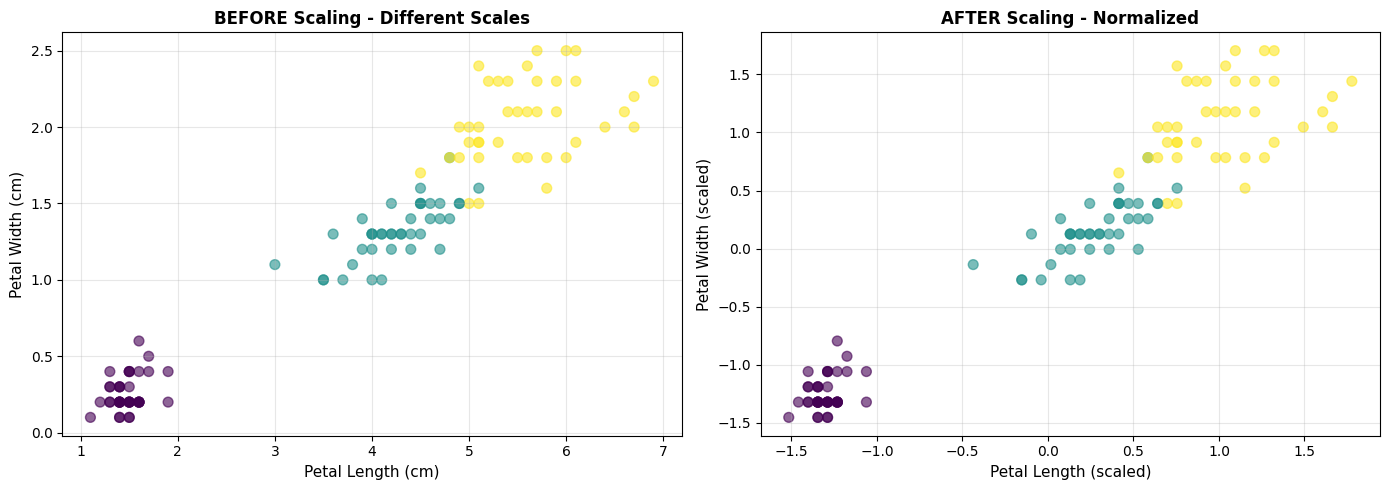

✅ Scaling makes features comparable!
✅ Most ML algorithms perform better with scaled data


4️⃣ CRITICAL: AVOIDING DATA LEAKAGE
----------------------------------------------------------------------
❌ WRONG WAY (causes data leakage):
  scaler.fit(entire_dataset)  # DON'T DO THIS!
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  Problem: Test set statistics leaked into training!

✅ CORRECT WAY:
  scaler.fit(X_train)  # Fit ONLY on training data
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)  # Use training statistics

  Result: Test set remains truly unseen!

✅ Train/test split and preprocessing completed for all 3 datasets!


In [ ]:
print("=" * 70)
print("TRAIN/TEST SPLIT & PREPROCESSING")
print("=" * 70)

# ============================================================================
# PART 1: Train/Test Split for All 3 Datasets
# ============================================================================
print("\n1️⃣ SPLITTING DATA INTO TRAIN AND TEST SETS")
print("-" * 70)

# Split Iris dataset
# train_test_split(X, y, test_size, random_state, stratify)
# stratify=y ensures each split has same class proportions
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris,
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # For reproducibility
    stratify=y_iris     # Keep class balance
)

print("🌸 IRIS:")
print(f"  Total samples: {len(X_iris)}")
print(f"  Training set: {len(X_train_iris)} samples ({len(X_train_iris)/len(X_iris)*100:.0f}%)")
print(f"  Test set: {len(X_test_iris)} samples ({len(X_test_iris)/len(X_iris)*100:.0f}%)")
print(f"  Features shape: {X_train_iris.shape}")
print(f"  Train class distribution: {np.bincount(y_train_iris)}")
print(f"  Test class distribution: {np.bincount(y_test_iris)}")

# Split Wine dataset
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine,
    test_size=0.2,
    random_state=42,
    stratify=y_wine
)

print("\n🍷 WINE:")
print(f"  Total samples: {len(X_wine)}")
print(f"  Training set: {len(X_train_wine)} samples")
print(f"  Test set: {len(X_test_wine)} samples")
print(f"  Train class distribution: {np.bincount(y_train_wine)}")

# Split Housing dataset (no stratify for regression)
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing,
    test_size=0.2,
    random_state=42
    # No stratify for regression (only for classification)
)

print("\n🏠 HOUSING:")
print(f"  Total samples: {len(X_housing):,}")
print(f"  Training set: {len(X_train_housing):,} samples")
print(f"  Test set: {len(X_test_housing):,} samples")
print(f"  Train price mean: ${y_train_housing.mean():.2f} (hundreds of thousands)")

# ============================================================================
# PART 2: Feature Scaling - StandardScaler
# ============================================================================
print("\n\n2️⃣ FEATURE SCALING WITH STANDARDSCALER")
print("-" * 70)

# Demonstrate need for scaling
print("BEFORE SCALING - Iris feature ranges:")
print(f"  Sepal length: {X_train_iris[:, 0].min():.2f} to {X_train_iris[:, 0].max():.2f}")
print(f"  Sepal width:  {X_train_iris[:, 1].min():.2f} to {X_train_iris[:, 1].max():.2f}")
print(f"  Petal length: {X_train_iris[:, 2].min():.2f} to {X_train_iris[:, 2].max():.2f}")
print(f"  Petal width:  {X_train_iris[:, 3].min():.2f} to {X_train_iris[:, 3].max():.2f}")

# Create scaler for Iris
scaler_iris = StandardScaler()

# IMPORTANT: Fit scaler ONLY on training data
# This prevents data leakage from test set
scaler_iris.fit(X_train_iris)

# Transform both train and test using training statistics
X_train_iris_scaled = scaler_iris.transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

print("\nAFTER SCALING - Iris (mean≈0, std≈1):")
print(f"  Feature 0 - Mean: {X_train_iris_scaled[:, 0].mean():.6f}, Std: {X_train_iris_scaled[:, 0].std():.6f}")
print(f"  Feature 1 - Mean: {X_train_iris_scaled[:, 1].mean():.6f}, Std: {X_train_iris_scaled[:, 1].std():.6f}")

# Scale Wine dataset
scaler_wine = StandardScaler()
X_train_wine_scaled = scaler_wine.fit_transform(X_train_wine)  # fit + transform in one step
X_test_wine_scaled = scaler_wine.transform(X_test_wine)

print("\n🍷 WINE scaled:")
print(f"  Original feature 0 range: {X_train_wine[:, 0].min():.2f} to {X_train_wine[:, 0].max():.2f}")
print(f"  Scaled feature 0 range: {X_train_wine_scaled[:, 0].min():.2f} to {X_train_wine_scaled[:, 0].max():.2f}")

# Scale Housing dataset
scaler_housing = StandardScaler()
X_train_housing_scaled = scaler_housing.fit_transform(X_train_housing)
X_test_housing_scaled = scaler_housing.transform(X_test_housing)

print("\n🏠 HOUSING scaled:")
print(f"  Before: Feature means range from {X_train_housing.mean(axis=0).min():.2f} to {X_train_housing.mean(axis=0).max():.2f}")
print(f"  After:  All features have mean ≈ 0, std ≈ 1")

# ============================================================================
# PART 3: Why Scaling Matters - Visualization
# ============================================================================
print("\n\n3️⃣ VISUALIZING IMPACT OF SCALING")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
ax = axes[0]
ax.scatter(X_train_iris[:, 2], X_train_iris[:, 3], 
          c=y_train_iris, cmap='viridis', alpha=0.6, s=50)
ax.set_xlabel('Petal Length (cm)', fontsize=11)
ax.set_ylabel('Petal Width (cm)', fontsize=11)
ax.set_title('BEFORE Scaling - Different Scales', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# After scaling
ax = axes[1]
ax.scatter(X_train_iris_scaled[:, 2], X_train_iris_scaled[:, 3], 
          c=y_train_iris, cmap='viridis', alpha=0.6, s=50)
ax.set_xlabel('Petal Length (scaled)', fontsize=11)
ax.set_ylabel('Petal Width (scaled)', fontsize=11)
ax.set_title('AFTER Scaling - Normalized', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Scaling makes features comparable!")
print("✅ Most ML algorithms perform better with scaled data")

# ============================================================================
# PART 4: Data Leakage Warning
# ============================================================================
print("\n\n4️⃣ CRITICAL: AVOIDING DATA LEAKAGE")
print("-" * 70)

print("❌ WRONG WAY (causes data leakage):")
print("  scaler.fit(entire_dataset)  # DON'T DO THIS!")
print("  X_train_scaled = scaler.transform(X_train)")
print("  X_test_scaled = scaler.transform(X_test)")
print("\n  Problem: Test set statistics leaked into training!")

print("\n✅ CORRECT WAY:")
print("  scaler.fit(X_train)  # Fit ONLY on training data")
print("  X_train_scaled = scaler.transform(X_train)")
print("  X_test_scaled = scaler.transform(X_test)  # Use training statistics")
print("\n  Result: Test set remains truly unseen!")

print("\n✅ Train/test split and preprocessing completed for all 3 datasets!")
print("=" * 70)

---

## **5. Classification Models - Predicting Categories**

**What is Classification?**
- Predicting which category (class) something belongs to
- Output: Discrete labels (0, 1, 2 or "setosa", "versicolor", "virginica")
- Examples: Email spam detection, disease diagnosis, species identification

**Models We'll Use:**
1. **Logistic Regression** - Simple, interpretable, great baseline
2. **Random Forest** - Ensemble of decision trees, handles non-linear patterns

**Datasets:**
- 🌸 **Iris**: 3 flower species based on 4 measurements
- 🍷 **Wine**: 3 wine types based on 13 chemical properties

In [ ]:
print("=" * 70)
print("CLASSIFICATION MODELS")
print("=" * 70)

# ============================================================================
# PART 1: Logistic Regression on Iris Dataset
# ============================================================================
print("\n1️⃣ LOGISTIC REGRESSION ON IRIS")
print("-" * 70)

# Create logistic regression model
# LogisticRegression is a LINEAR classifier despite the name
# It works well for linearly separable classes
lr_iris = LogisticRegression(
    max_iter=200,      # Maximum iterations for convergence
    random_state=42    # For reproducibility
)

# Train the model
# .fit() learns the decision boundaries from training data
print("Training Logistic Regression on Iris (120 samples)...")
lr_iris.fit(X_train_iris_scaled, y_train_iris)

# Make predictions on test set
# .predict() returns predicted class labels
y_pred_iris_lr = lr_iris.predict(X_test_iris_scaled)

# Calculate accuracy
# accuracy = (correct predictions) / (total predictions)
accuracy_iris_lr = accuracy_score(y_test_iris, y_pred_iris_lr)

print(f"\n✅ Model trained successfully!")
print(f"📊 Test Accuracy: {accuracy_iris_lr:.2%}")
print(f"   Got {int(accuracy_iris_lr * len(y_test_iris))} out of {len(y_test_iris)} correct")

# Show some predictions vs actual
print("\n🔍 Sample Predictions (first 10):")
print(f"   Predicted: {y_pred_iris_lr[:10]}")
print(f"   Actual:    {y_test_iris[:10]}")
print(f"   Match:     {y_pred_iris_lr[:10] == y_test_iris[:10]}")

# Confusion Matrix
# Shows where model gets confused between classes
cm_iris_lr = confusion_matrix(y_test_iris, y_pred_iris_lr)
print("\n📋 Confusion Matrix:")
print("   Rows = Actual, Columns = Predicted")
print(cm_iris_lr)

# Classification Report
# Precision, Recall, F1-score for each class
print("\n📈 Classification Report:")
print(classification_report(y_test_iris, y_pred_iris_lr, 
                          target_names=['Setosa', 'Versicolor', 'Virginica']))

# ============================================================================
# PART 2: Random Forest on Iris Dataset
# ============================================================================
print("\n" + "=" * 70)
print("2️⃣ RANDOM FOREST ON IRIS")
print("-" * 70)

# Create Random Forest classifier
# Ensemble of 100 decision trees voting together
rf_iris = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=5,        # Maximum depth of each tree
    random_state=42     # For reproducibility
)

# Train the model
print("Training Random Forest (100 trees) on Iris...")
rf_iris.fit(X_train_iris_scaled, y_train_iris)

# Make predictions
y_pred_iris_rf = rf_iris.predict(X_test_iris_scaled)

# Calculate accuracy
accuracy_iris_rf = accuracy_score(y_test_iris, y_pred_iris_rf)

print(f"\n✅ Model trained successfully!")
print(f"📊 Test Accuracy: {accuracy_iris_rf:.2%}")
print(f"   Improvement over Logistic Regression: {(accuracy_iris_rf - accuracy_iris_lr):.2%}")

# Feature Importance
# Which features matter most for prediction?
feature_importance_iris = rf_iris.feature_importances_
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

print("\n🎯 Feature Importance (which features matter most?):")
for name, importance in zip(feature_names, feature_importance_iris):
    print(f"   {name:15s}: {'█' * int(importance * 50)} {importance:.3f}")

# ============================================================================
# PART 3: Logistic Regression on Wine Dataset
# ============================================================================
print("\n" + "=" * 70)
print("3️⃣ LOGISTIC REGRESSION ON WINE")
print("-" * 70)

# Train model on wine dataset
lr_wine = LogisticRegression(max_iter=1000, random_state=42)
print("Training Logistic Regression on Wine (142 samples)...")
lr_wine.fit(X_train_wine_scaled, y_train_wine)

# Predictions and evaluation
y_pred_wine_lr = lr_wine.predict(X_test_wine_scaled)
accuracy_wine_lr = accuracy_score(y_test_wine, y_pred_wine_lr)

print(f"\n✅ Test Accuracy: {accuracy_wine_lr:.2%}")

# Confusion matrix
cm_wine_lr = confusion_matrix(y_test_wine, y_pred_wine_lr)
print("\n📋 Confusion Matrix:")
print(cm_wine_lr)

# ============================================================================
# PART 4: Random Forest on Wine Dataset
# ============================================================================
print("\n" + "=" * 70)
print("4️⃣ RANDOM FOREST ON WINE")
print("-" * 70)

# Train Random Forest
rf_wine = RandomForestClassifier(n_estimators=100, random_state=42)
print("Training Random Forest on Wine...")
rf_wine.fit(X_train_wine_scaled, y_train_wine)

# Predictions and evaluation
y_pred_wine_rf = rf_wine.predict(X_test_wine_scaled)
accuracy_wine_rf = accuracy_score(y_test_wine, y_pred_wine_rf)

print(f"\n✅ Test Accuracy: {accuracy_wine_rf:.2%}")

# Top 5 most important features
feature_importance_wine = rf_wine.feature_importances_
top_5_indices = np.argsort(feature_importance_wine)[-5:][::-1]

print("\n🎯 Top 5 Most Important Features:")
for i, idx in enumerate(top_5_indices, 1):
    print(f"   {i}. Feature {idx}: {feature_importance_wine[idx]:.3f}")

# ============================================================================
# PART 5: Model Comparison Visualization
# ============================================================================
print("\n" + "=" * 70)
print("5️⃣ COMPARING ALL CLASSIFICATION MODELS")
print("-" * 70)

# Create comparison bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Iris comparison
ax = axes[0]
models = ['Logistic\nRegression', 'Random\nForest']
accuracies = [accuracy_iris_lr, accuracy_iris_rf]
bars = ax.bar(models, accuracies, color=['#3498db', '#2ecc71'], alpha=0.7, edgecolor='black')
ax.set_ylim(0.9, 1.0)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('🌸 Iris Classification', fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.2%}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Wine comparison
ax = axes[1]
accuracies = [accuracy_wine_lr, accuracy_wine_rf]
bars = ax.bar(models, accuracies, color=['#3498db', '#2ecc71'], alpha=0.7, edgecolor='black')
ax.set_ylim(0.9, 1.0)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('🍷 Wine Classification', fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.2%}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Classification models trained and evaluated!")
print("=" * 70)

---

## **6. Regression Models - Predicting Numbers**

**What is Regression?**
- Predicting continuous numerical values
- Output: Real numbers (house prices, temperatures, stock prices)
- Examples: Predicting house prices, sales forecasting, temperature prediction

**Models We'll Use:**
1. **Linear Regression** - Assumes linear relationship between features and target
2. **Random Forest Regressor** - Handles non-linear patterns, more flexible

**Dataset:**
- 🏠 **California Housing**: Predict median house prices based on 8 features
  - Features: population, median income, house age, average rooms, etc.
  - Target: Median house value (in $100,000s)

In [ ]:
print("=" * 70)
print("REGRESSION MODELS")
print("=" * 70)

# ============================================================================
# PART 1: Linear Regression on Housing Dataset
# ============================================================================
print("\n1️⃣ LINEAR REGRESSION ON CALIFORNIA HOUSING")
print("-" * 70)

# Create Linear Regression model
# Fits a linear equation: y = w1*x1 + w2*x2 + ... + b
lr_housing = LinearRegression()

# Train the model
print(f"Training Linear Regression on {len(X_train_housing):,} houses...")
lr_housing.fit(X_train_housing_scaled, y_train_housing)

# Make predictions on test set
y_pred_housing_lr = lr_housing.predict(X_test_housing_scaled)

# Calculate regression metrics
# MAE = Mean Absolute Error (average difference)
mae_lr = mean_absolute_error(y_test_housing, y_pred_housing_lr)
# MSE = Mean Squared Error (penalizes large errors more)
mse_lr = mean_squared_error(y_test_housing, y_pred_housing_lr)
# RMSE = Root Mean Squared Error (same units as target)
rmse_lr = np.sqrt(mse_lr)
# R² = Coefficient of determination (1.0 = perfect, 0.0 = bad)
r2_lr = r2_score(y_test_housing, y_pred_housing_lr)

print(f"\n✅ Model trained successfully!")
print(f"\n📊 Regression Metrics:")
print(f"   MAE (Mean Absolute Error):  ${mae_lr:.2f} (hundred thousands)")
print(f"   MSE (Mean Squared Error):   {mse_lr:.2f}")
print(f"   RMSE (Root MSE):            ${rmse_lr:.2f}")
print(f"   R² Score:                   {r2_lr:.4f} (closer to 1.0 is better)")
print(f"\n   💡 On average, predictions are off by ${mae_lr:.2f} × $100k = ${mae_lr*100:.0f}k")

# Show sample predictions
print("\n🔍 Sample Predictions (first 5 houses):")
for i in range(5):
    print(f"   House {i+1}: Predicted ${y_pred_housing_lr[i]:.2f}, Actual ${y_test_housing.iloc[i]:.2f}, "
          f"Diff ${abs(y_pred_housing_lr[i] - y_test_housing.iloc[i]):.2f}")

# Model coefficients
# Each coefficient shows feature importance (how much it affects price)
print("\n🎯 Feature Coefficients (impact on price):")
housing_feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                         'Population', 'AveOccup', 'Latitude', 'Longitude']
coefficients = lr_housing.coef_
for name, coef in sorted(zip(housing_feature_names, coefficients), 
                         key=lambda x: abs(x[1]), reverse=True)[:5]:
    sign = "+" if coef > 0 else ""
    print(f"   {name:12s}: {sign}{coef:.3f}")

# ============================================================================
# PART 2: Random Forest Regressor on Housing Dataset
# ============================================================================
print("\n" + "=" * 70)
print("2️⃣ RANDOM FOREST REGRESSOR ON HOUSING")
print("-" * 70)

# Create Random Forest Regressor
# Ensemble of decision trees for regression
rf_housing = RandomForestRegressor(
    n_estimators=100,   # 100 trees
    max_depth=20,       # Maximum depth
    random_state=42,
    n_jobs=-1           # Use all CPU cores for faster training
)

# Train the model
print(f"Training Random Forest (100 trees) on {len(X_train_housing):,} houses...")
rf_housing.fit(X_train_housing_scaled, y_train_housing)

# Make predictions
y_pred_housing_rf = rf_housing.predict(X_test_housing_scaled)

# Calculate metrics
mae_rf = mean_absolute_error(y_test_housing, y_pred_housing_rf)
mse_rf = mean_squared_error(y_test_housing, y_pred_housing_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_housing, y_pred_housing_rf)

print(f"\n✅ Model trained successfully!")
print(f"\n📊 Regression Metrics:")
print(f"   MAE:  ${mae_rf:.2f}")
print(f"   RMSE: ${rmse_rf:.2f}")
print(f"   R²:   {r2_rf:.4f}")
print(f"\n   ✨ Improvement over Linear Regression:")
print(f"      MAE improved by:  ${mae_lr - mae_rf:.2f}")
print(f"      R² improved by:   {r2_rf - r2_lr:.4f}")

# Feature importance for Random Forest
feature_importance_housing = rf_housing.feature_importances_

print("\n🎯 Feature Importance (what matters most for price?):")
importance_pairs = sorted(zip(housing_feature_names, feature_importance_housing), 
                         key=lambda x: x[1], reverse=True)
for name, importance in importance_pairs:
    bar = '█' * int(importance * 100)
    print(f"   {name:12s}: {bar} {importance:.3f}")

# ============================================================================
# PART 3: Predictions vs Actual Visualization
# ============================================================================
print("\n" + "=" * 70)
print("3️⃣ VISUALIZING PREDICTIONS")
print("-" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Linear Regression: Predicted vs Actual
ax = axes[0, 0]
ax.scatter(y_test_housing, y_pred_housing_lr, alpha=0.3, s=20, color='blue')
ax.plot([y_test_housing.min(), y_test_housing.max()], 
        [y_test_housing.min(), y_test_housing.max()], 
        'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price ($100k)', fontsize=11)
ax.set_ylabel('Predicted Price ($100k)', fontsize=11)
ax.set_title('Linear Regression: Predicted vs Actual', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Random Forest: Predicted vs Actual
ax = axes[0, 1]
ax.scatter(y_test_housing, y_pred_housing_rf, alpha=0.3, s=20, color='green')
ax.plot([y_test_housing.min(), y_test_housing.max()], 
        [y_test_housing.min(), y_test_housing.max()], 
        'r--', lw=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price ($100k)', fontsize=11)
ax.set_ylabel('Predicted Price ($100k)', fontsize=11)
ax.set_title('Random Forest: Predicted vs Actual', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Linear Regression: Residuals (errors)
ax = axes[1, 0]
residuals_lr = y_test_housing - y_pred_housing_lr
ax.scatter(y_pred_housing_lr, residuals_lr, alpha=0.3, s=20, color='blue')
ax.axhline(y=0, color='r', linestyle='--', lw=2)
ax.set_xlabel('Predicted Price ($100k)', fontsize=11)
ax.set_ylabel('Residual (Actual - Predicted)', fontsize=11)
ax.set_title('Linear Regression: Residual Plot', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Random Forest: Residuals
ax = axes[1, 1]
residuals_rf = y_test_housing - y_pred_housing_rf
ax.scatter(y_pred_housing_rf, residuals_rf, alpha=0.3, s=20, color='green')
ax.axhline(y=0, color='r', linestyle='--', lw=2)
ax.set_xlabel('Predicted Price ($100k)', fontsize=11)
ax.set_ylabel('Residual (Actual - Predicted)', fontsize=11)
ax.set_title('Random Forest: Residual Plot', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# PART 4: Model Comparison
# ============================================================================
print("\n" + "=" * 70)
print("4️⃣ REGRESSION MODEL COMPARISON")
print("-" * 70)

# Create comparison chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MAE comparison
ax = axes[0]
models = ['Linear\nRegression', 'Random\nForest']
mae_values = [mae_lr, mae_rf]
bars = ax.bar(models, mae_values, color=['#3498db', '#2ecc71'], alpha=0.7, edgecolor='black')
ax.set_ylabel('MAE (Mean Absolute Error)', fontsize=12)
ax.set_title('Lower is Better', fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'${height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# R² comparison
ax = axes[1]
r2_values = [r2_lr, r2_rf]
bars = ax.bar(models, r2_values, color=['#3498db', '#2ecc71'], alpha=0.7, edgecolor='black')
ax.set_ylabel('R² Score', fontsize=12)
ax.set_title('Higher is Better (max 1.0)', fontsize=13, fontweight='bold')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Regression models trained and evaluated!")
print(f"🏆 Winner: Random Forest (R²={r2_rf:.4f}, MAE=${mae_rf:.2f})")
print("=" * 70)

---

## **7. Cross-Validation - Robust Model Evaluation**

**Why Cross-Validation?**
- Single train/test split might be lucky or unlucky
- Cross-validation tests model on multiple different splits
- More reliable estimate of true performance

**K-Fold Cross-Validation:**
1. Split data into K folds (usually 5 or 10)
2. Train on K-1 folds, test on remaining fold
3. Repeat K times, each fold gets to be test set once
4. Average the K scores for final metric

**Benefits:**
- Uses all data for both training and testing
- Reduces variance in performance estimates
- Detects overfitting more reliably

In [ ]:
print("=" * 70)
print("CROSS-VALIDATION")
print("=" * 70)

# ============================================================================
# PART 1: Cross-Validation on Iris Dataset
# ============================================================================
print("\n1️⃣ 5-FOLD CROSS-VALIDATION ON IRIS")
print("-" * 70)

# Prepare fresh model (not trained yet)
lr_iris_cv = LogisticRegression(max_iter=200, random_state=42)

# Perform 5-fold cross-validation
# cv=5 means split data into 5 parts
# Each part becomes test set once, others are training
print("Running 5-Fold Cross-Validation...")

# Create scaled version of full dataset for CV
scaler_iris_full = StandardScaler()
X_iris_scaled = scaler_iris_full.fit_transform(X_iris)

cv_scores_iris = cross_val_score(
    lr_iris_cv,              # Model to evaluate
    X_iris_scaled,           # Full feature set (scaled)
    y_iris,                  # Full target (not split)
    cv=5,                    # 5 folds
    scoring='accuracy'       # Metric to compute
)

print(f"\n📊 Cross-Validation Scores (5 folds):")
for fold, score in enumerate(cv_scores_iris, 1):
    bar = '█' * int(score * 50)
    print(f"   Fold {fold}: {bar} {score:.4f} ({score:.2%})")

print(f"\n📈 Summary Statistics:")
print(f"   Mean Accuracy:  {cv_scores_iris.mean():.4f} ± {cv_scores_iris.std():.4f}")
print(f"   Best Fold:      {cv_scores_iris.max():.4f}")
print(f"   Worst Fold:     {cv_scores_iris.min():.4f}")
print(f"   Range:          {cv_scores_iris.max() - cv_scores_iris.min():.4f}")

# ============================================================================
# PART 2: Cross-Validation on Wine Dataset
# ============================================================================
print("\n" + "=" * 70)
print("2️⃣ 5-FOLD CROSS-VALIDATION ON WINE")
print("-" * 70)

# Random Forest on Wine
rf_wine_cv = RandomForestClassifier(n_estimators=100, random_state=42)

print("Running 5-Fold Cross-Validation on Wine...")

# Create scaled version of full dataset for CV
scaler_wine_full = StandardScaler()
X_wine_scaled = scaler_wine_full.fit_transform(X_wine)

cv_scores_wine = cross_val_score(
    rf_wine_cv,
    X_wine_scaled,
    y_wine,
    cv=5,
    scoring='accuracy'
)

print(f"\n📊 Cross-Validation Scores:")
for fold, score in enumerate(cv_scores_wine, 1):
    print(f"   Fold {fold}: {score:.4f}")

print(f"\n📈 Mean Accuracy: {cv_scores_wine.mean():.4f} ± {cv_scores_wine.std():.4f}")

# ============================================================================
# PART 3: Cross-Validation on Housing Dataset (Regression)
# ============================================================================
print("\n" + "=" * 70)
print("3️⃣ 5-FOLD CROSS-VALIDATION ON HOUSING")
print("-" * 70)

# Random Forest Regressor with cross-validation
rf_housing_cv = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Running 5-Fold Cross-Validation on Housing...")

# Create scaled version of full dataset for CV
scaler_housing_full = StandardScaler()
X_housing_scaled = scaler_housing_full.fit_transform(X_housing)

# For regression, use negative MSE (sklearn convention)
# We negate it to get positive MSE values
cv_scores_housing_mse = -cross_val_score(
    rf_housing_cv,
    X_housing_scaled,
    y_housing,
    cv=5,
    scoring='neg_mean_squared_error'  # Returns negative MSE
)

# Convert to RMSE (Root Mean Squared Error)
cv_scores_housing_rmse = np.sqrt(cv_scores_housing_mse)

print(f"\n📊 Cross-Validation RMSE (5 folds):")
for fold, rmse in enumerate(cv_scores_housing_rmse, 1):
    print(f"   Fold {fold}: ${rmse:.2f}")

print(f"\n📈 Mean RMSE: ${cv_scores_housing_rmse.mean():.2f} ± ${cv_scores_housing_rmse.std():.2f}")

# Also get R² scores
cv_scores_housing_r2 = cross_val_score(
    rf_housing_cv,
    X_housing_scaled,
    y_housing,
    cv=5,
    scoring='r2'
)

print(f"📈 Mean R²: {cv_scores_housing_r2.mean():.4f} ± {cv_scores_housing_r2.std():.4f}")

# ============================================================================
# PART 4: Comparing Single Split vs Cross-Validation
# ============================================================================
print("\n" + "=" * 70)
print("4️⃣ SINGLE SPLIT VS CROSS-VALIDATION")
print("-" * 70)

print("\n🔍 Why Cross-Validation is Better:")
print("\n   Single Train/Test Split:")
print(f"      • One accuracy score: {accuracy_iris_lr:.4f}")
print(f"      • Could be lucky or unlucky")
print(f"      • No idea if result is stable")

print("\n   5-Fold Cross-Validation:")
print(f"      • Five accuracy scores: {cv_scores_iris}")
print(f"      • Mean: {cv_scores_iris.mean():.4f}, Std: {cv_scores_iris.std():.4f}")
print(f"      • More reliable estimate")
print(f"      • Can see variance across folds")

# ============================================================================
# PART 5: Visualization of Cross-Validation Results
# ============================================================================
print("\n" + "=" * 70)
print("5️⃣ VISUALIZING CROSS-VALIDATION")
print("-" * 70)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Iris CV scores
ax = axes[0]
folds = list(range(1, 6))
ax.plot(folds, cv_scores_iris, 'o-', linewidth=2, markersize=8, color='blue', label='Fold Scores')
ax.axhline(cv_scores_iris.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores_iris.mean():.3f}')
ax.fill_between(folds, 
                cv_scores_iris.mean() - cv_scores_iris.std(),
                cv_scores_iris.mean() + cv_scores_iris.std(),
                alpha=0.2, color='red', label='±1 Std Dev')
ax.set_xlabel('Fold Number', fontsize=11)
ax.set_ylabel('Accuracy', fontsize=11)
ax.set_title('🌸 Iris: Cross-Validation Scores', fontsize=12, fontweight='bold')
ax.set_xticks(folds)
ax.legend()
ax.grid(True, alpha=0.3)

# Wine CV scores
ax = axes[1]
ax.plot(folds, cv_scores_wine, 'o-', linewidth=2, markersize=8, color='purple', label='Fold Scores')
ax.axhline(cv_scores_wine.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores_wine.mean():.3f}')
ax.fill_between(folds,
                cv_scores_wine.mean() - cv_scores_wine.std(),
                cv_scores_wine.mean() + cv_scores_wine.std(),
                alpha=0.2, color='red', label='±1 Std Dev')
ax.set_xlabel('Fold Number', fontsize=11)
ax.set_ylabel('Accuracy', fontsize=11)
ax.set_title('🍷 Wine: Cross-Validation Scores', fontsize=12, fontweight='bold')
ax.set_xticks(folds)
ax.legend()
ax.grid(True, alpha=0.3)

# Housing CV scores (RMSE)
ax = axes[2]
ax.plot(folds, cv_scores_housing_rmse, 'o-', linewidth=2, markersize=8, color='green', label='Fold RMSE')
ax.axhline(cv_scores_housing_rmse.mean(), color='red', linestyle='--', linewidth=2, 
          label=f'Mean: ${cv_scores_housing_rmse.mean():.2f}')
ax.fill_between(folds,
                cv_scores_housing_rmse.mean() - cv_scores_housing_rmse.std(),
                cv_scores_housing_rmse.mean() + cv_scores_housing_rmse.std(),
                alpha=0.2, color='red', label='±1 Std Dev')
ax.set_xlabel('Fold Number', fontsize=11)
ax.set_ylabel('RMSE', fontsize=11)
ax.set_title('🏠 Housing: Cross-Validation RMSE', fontsize=12, fontweight='bold')
ax.set_xticks(folds)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Cross-validation provides robust performance estimates!")
print("=" * 70)

---

## **8. Hyperparameter Tuning - Finding the Best Settings**

**What are Hyperparameters?**
- Settings you choose BEFORE training (not learned from data)
- Examples: number of trees in Random Forest, learning rate, max depth
- Different values → different model performance

**Grid Search:**
- Try all combinations of hyperparameter values
- Use cross-validation to evaluate each combination
- Select the best performing combination

**Example:**
- If testing 3 values for `n_estimators` and 3 for `max_depth`
- Grid Search tries all 3 × 3 = 9 combinations
- With 5-fold CV, that's 9 × 5 = 45 model trainings!

In [ ]:
print("=" * 70)
print("HYPERPARAMETER TUNING WITH GRID SEARCH")
print("=" * 70)

# ============================================================================
# PART 1: Grid Search on Iris Random Forest
# ============================================================================
print("\n1️⃣ TUNING RANDOM FOREST ON IRIS")
print("-" * 70)

# Define hyperparameter grid to search
# We'll test different combinations of these values
param_grid_iris = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [3, 5, 10, None],         # Maximum tree depth
    'min_samples_split': [2, 5, 10]        # Minimum samples to split node
}

# Calculate total combinations
total_combinations = (len(param_grid_iris['n_estimators']) * 
                     len(param_grid_iris['max_depth']) * 
                     len(param_grid_iris['min_samples_split']))
print(f"Testing {total_combinations} hyperparameter combinations with 5-fold CV")
print(f"Total model trainings: {total_combinations * 5}")

# Create base model
rf_base = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
# This will try all combinations and find the best
grid_search_iris = GridSearchCV(
    estimator=rf_base,      # Model to tune
    param_grid=param_grid_iris,  # Hyperparameters to try
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',     # Metric to optimize
    n_jobs=-1,              # Use all CPU cores
    verbose=1               # Show progress
)

# Run grid search
print("\n🔍 Searching for best hyperparameters...")
grid_search_iris.fit(X_iris_scaled, y_iris)

# Best parameters found
print(f"\n✅ Grid Search Complete!")
print(f"\n🏆 Best Hyperparameters:")
for param, value in grid_search_iris.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n📊 Best Cross-Validation Score: {grid_search_iris.best_score_:.4f}")

# Compare with default parameters
rf_default = RandomForestClassifier(random_state=42)
# Use unscaled data with StandardScaler transform for fair comparison
default_scores = cross_val_score(rf_default, X_iris_scaled, y_iris, cv=5)
print(f"📊 Default Parameters Score:    {default_scores.mean():.4f}")
print(f"\n✨ Improvement: {(grid_search_iris.best_score_ - default_scores.mean()):.4f}")

# ============================================================================
# PART 2: Grid Search on Wine Dataset
# ============================================================================
print("\n" + "=" * 70)
print("2️⃣ TUNING RANDOM FOREST ON WINE")
print("-" * 70)

# Smaller grid for Wine (fewer samples)
param_grid_wine = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5]
}

print(f"Testing {3 * 3 * 2} combinations...")

grid_search_wine = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_wine,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("🔍 Searching...")
grid_search_wine.fit(X_wine_scaled, y_wine)

print(f"\n🏆 Best Parameters: {grid_search_wine.best_params_}")
print(f"📊 Best CV Score: {grid_search_wine.best_score_:.4f}")

# ============================================================================
# PART 3: Grid Search on Housing Dataset (Regression)
# ============================================================================
print("\n" + "=" * 70)
print("3️⃣ TUNING RANDOM FOREST ON HOUSING")
print("-" * 70)

# Grid for regression
param_grid_housing = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5]
}

print(f"Testing {2 * 3 * 2} combinations...")

grid_search_housing = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid_housing,
    cv=3,  # Use 3 folds (dataset is large)
    scoring='r2',  # Optimize R² score
    n_jobs=-1,
    verbose=1
)

print("🔍 Searching (this may take a minute with 16k+ samples)...")
grid_search_housing.fit(X_housing_scaled, y_housing)

print(f"\n🏆 Best Parameters: {grid_search_housing.best_params_}")
print(f"📊 Best CV R² Score: {grid_search_housing.best_score_:.4f}")

# ============================================================================
# PART 4: Visualizing Grid Search Results
# ============================================================================
print("\n" + "=" * 70)
print("4️⃣ ANALYZING GRID SEARCH RESULTS")
print("-" * 70)

# Extract results for Iris
cv_results_iris = grid_search_iris.cv_results_

# Get top 10 parameter combinations
top_10_indices = np.argsort(cv_results_iris['mean_test_score'])[-10:][::-1]

print("\n🏆 Top 10 Hyperparameter Combinations for Iris:")
print("-" * 70)
for rank, idx in enumerate(top_10_indices, 1):
    params = cv_results_iris['params'][idx]
    score = cv_results_iris['mean_test_score'][idx]
    print(f"{rank:2d}. Score: {score:.4f} | n_est={params['n_estimators']:3d}, "
          f"depth={str(params['max_depth']):4s}, split={params['min_samples_split']:2d}")

# Visualize effect of n_estimators
print("\n" + "=" * 70)
print("5️⃣ VISUALIZING HYPERPARAMETER IMPACT")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Extract scores for different n_estimators (fixing other params)
ax = axes[0]
n_est_values = sorted(set([params['n_estimators'] for params in cv_results_iris['params']]))
mean_scores_by_n_est = []

for n_est in n_est_values:
    # Get all scores with this n_estimators value
    scores = [cv_results_iris['mean_test_score'][i] 
              for i, params in enumerate(cv_results_iris['params']) 
              if params['n_estimators'] == n_est]
    mean_scores_by_n_est.append(np.mean(scores))

ax.plot(n_est_values, mean_scores_by_n_est, 'o-', linewidth=2, markersize=10, color='blue')
ax.set_xlabel('Number of Trees (n_estimators)', fontsize=11)
ax.set_ylabel('Mean CV Accuracy', fontsize=11)
ax.set_title('Effect of Number of Trees', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Compare all three datasets
ax = axes[1]
models = ['Iris', 'Wine', 'Housing']
best_scores = [grid_search_iris.best_score_, 
               grid_search_wine.best_score_, 
               grid_search_housing.best_score_]
colors = ['#3498db', '#9b59b6', '#2ecc71']
bars = ax.bar(models, best_scores, color=colors, alpha=0.7, edgecolor='black')
ax.set_ylabel('Best CV Score', fontsize=12)
ax.set_title('Best Tuned Model Performance', fontsize=12, fontweight='bold')
ax.set_ylim(0.8, 1.0)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar, score in zip(bars, best_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{score:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Hyperparameter tuning complete!")
print("🎯 Grid Search found optimal settings for each dataset")
print("=" * 70)

---

## **9. ML Pipelines - Professional Workflow**

**What is a Pipeline?**
- Chains together preprocessing steps + model into one object
- Ensures preprocessing is done consistently on train and test data
- Prevents data leakage automatically
- Makes code cleaner and more maintainable

**Why Pipelines Matter:**
1. **Prevents Data Leakage** - Scaler fits only on training fold in CV
2. **Cleaner Code** - One `.fit()` instead of multiple steps
3. **Easier Deployment** - Save entire pipeline as single object
4. **Grid Search Integration** - Can tune preprocessing AND model together

**Pipeline Structure:**
```
Pipeline([
    ('scaler', StandardScaler()),      # Step 1: Scale features
    ('classifier', RandomForest())     # Step 2: Train model
])
```

In [ ]:
print("=" * 70)
print("MACHINE LEARNING PIPELINES")
print("=" * 70)

# ============================================================================
# PART 1: Creating a Simple Pipeline for Iris
# ============================================================================
print("\n1️⃣ BUILDING A PIPELINE FOR IRIS")
print("-" * 70)

# Create pipeline: Scaler → Classifier
# Pipeline automatically applies steps in sequence
pipeline_iris = Pipeline([
    ('scaler', StandardScaler()),           # Step 1: Normalize features
    ('classifier', LogisticRegression(max_iter=200, random_state=42))  # Step 2: Train model
])

print("Pipeline created with 2 steps:")
print("  1. StandardScaler (normalize features)")
print("  2. LogisticRegression (classify)")

# Train pipeline with single fit() call
# Internally: fits scaler on train data, transforms train data, trains classifier
print("\nTraining pipeline on Iris...")
pipeline_iris.fit(X_train_iris, y_train_iris)

# Make predictions
# Internally: transforms test data with fitted scaler, predicts with classifier
y_pred_pipeline = pipeline_iris.predict(X_test_iris)

# Evaluate
accuracy_pipeline = accuracy_score(y_test_iris, y_pred_pipeline)
print(f"\n✅ Pipeline Accuracy: {accuracy_pipeline:.4f}")

# ============================================================================
# PART 2: Pipeline with Cross-Validation
# ============================================================================
print("\n" + "=" * 70)
print("2️⃣ PIPELINE WITH CROSS-VALIDATION")
print("-" * 70)

# Why pipelines are crucial for CV:
# Without pipeline: Scaler sees ALL data → DATA LEAKAGE
# With pipeline: Each CV fold fits scaler only on that fold's training data

print("Running 5-fold CV with pipeline (prevents data leakage)...")

# Cross-validate the entire pipeline
cv_scores_pipeline = cross_val_score(
    pipeline_iris,      # Entire pipeline
    X_iris,             # RAW features (not scaled)
    y_iris,
    cv=5,
    scoring='accuracy'
)

print(f"\n📊 Cross-Validation Scores: {cv_scores_pipeline}")
print(f"📈 Mean: {cv_scores_pipeline.mean():.4f} ± {cv_scores_pipeline.std():.4f}")

print("\n💡 Pipeline automatically:")
print("   • Fits scaler on training folds only")
print("   • Transforms test folds with training statistics")
print("   • Prevents data leakage in every CV fold")

# ============================================================================
# PART 3: Pipeline with Grid Search
# ============================================================================
print("\n" + "=" * 70)
print("3️⃣ PIPELINE + GRID SEARCH = ULTIMATE COMBO")
print("-" * 70)

# Create pipeline with Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid
# Use 'stepname__parameter' syntax to specify parameters
param_grid_pipeline = {
    'classifier__n_estimators': [50, 100, 150],     # RF parameter
    'classifier__max_depth': [5, 10, None],         # RF parameter
    'classifier__min_samples_split': [2, 5]         # RF parameter
}

print(f"Testing {3 * 3 * 2} hyperparameter combinations...")

# Grid search on pipeline
grid_search_pipeline = GridSearchCV(
    pipeline_rf,
    param_grid_pipeline,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\n🔍 Running Grid Search with Pipeline on Iris...")
grid_search_pipeline.fit(X_iris, y_iris)  # RAW data (pipeline handles scaling)

print(f"\n🏆 Best Parameters:")
for param, value in grid_search_pipeline.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📊 Best Score: {grid_search_pipeline.best_score_:.4f}")

# ============================================================================
# PART 4: Complete Pipeline for Wine Dataset
# ============================================================================
print("\n" + "=" * 70)
print("4️⃣ COMPLETE PIPELINE FOR WINE")
print("-" * 70)

# Build complete ML workflow
pipeline_wine = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train pipeline
print("Training Wine classification pipeline...")
pipeline_wine.fit(X_train_wine, y_train_wine)

# Evaluate
y_pred_wine_pipeline = pipeline_wine.predict(X_test_wine)
accuracy_wine_pipeline = accuracy_score(y_test_wine, y_pred_wine_pipeline)

print(f"✅ Wine Pipeline Accuracy: {accuracy_wine_pipeline:.4f}")

# Show confusion matrix
cm_wine_pipeline = confusion_matrix(y_test_wine, y_pred_wine_pipeline)
print("\n📋 Confusion Matrix:")
print(cm_wine_pipeline)

# ============================================================================
# PART 5: Regression Pipeline for Housing
# ============================================================================
print("\n" + "=" * 70)
print("5️⃣ REGRESSION PIPELINE FOR HOUSING")
print("-" * 70)

# Create regression pipeline
pipeline_housing = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Train on subset for speed (first 5000 samples)
print("Training Housing regression pipeline...")
X_train_subset = X_train_housing[:5000]
y_train_subset = y_train_housing[:5000]

pipeline_housing.fit(X_train_subset, y_train_subset)

# Predict and evaluate
y_pred_housing_pipeline = pipeline_housing.predict(X_test_housing)
mae_housing_pipeline = mean_absolute_error(y_test_housing, y_pred_housing_pipeline)
r2_housing_pipeline = r2_score(y_test_housing, y_pred_housing_pipeline)

print(f"\n✅ Housing Pipeline Performance:")
print(f"   MAE:  ${mae_housing_pipeline:.2f}")
print(f"   R²:   {r2_housing_pipeline:.4f}")

# ============================================================================
# PART 6: Pipeline Benefits Summary
# ============================================================================
print("\n" + "=" * 70)
print("6️⃣ WHY USE PIPELINES? COMPARISON")
print("-" * 70)

print("\n❌ WITHOUT Pipeline (manual workflow):")
print("""
   # Step 1: Scale training data
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   
   # Step 2: Scale test data (RISK: might use test data accidentally)
   X_test_scaled = scaler.transform(X_test)
   
   # Step 3: Train model
   model = RandomForest()
   model.fit(X_train_scaled, y_train)
   
   # Step 4: Predict
   y_pred = model.predict(X_test_scaled)
   
   # Problem: Easy to make mistakes, especially in CV!
""")

print("✅ WITH Pipeline (professional workflow):")
print("""
   # Create pipeline
   pipeline = Pipeline([
       ('scaler', StandardScaler()),
       ('model', RandomForest())
   ])
   
   # Single fit handles everything correctly
   pipeline.fit(X_train, y_train)
   
   # Single predict handles everything correctly
   y_pred = pipeline.predict(X_test)
   
   # Benefits: Clean, safe, no data leakage possible!
""")

# ============================================================================
# PART 7: Visualizing Pipeline Performance
# ============================================================================
print("\n" + "=" * 70)
print("7️⃣ PIPELINE PERFORMANCE VISUALIZATION")
print("-" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Classification pipelines comparison
ax = axes[0]
datasets = ['Iris', 'Wine']
accuracies = [accuracy_pipeline, accuracy_wine_pipeline]
colors = ['#3498db', '#9b59b6']
bars = ax.bar(datasets, accuracies, color=colors, alpha=0.7, edgecolor='black', width=0.5)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Pipeline Performance - Classification', fontsize=13, fontweight='bold')
ax.set_ylim(0.9, 1.0)
ax.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.2%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Regression pipeline
ax = axes[1]
metrics = ['MAE', 'R² Score']
values = [mae_housing_pipeline, r2_housing_pipeline]
colors = ['#e74c3c', '#2ecc71']
bars = ax.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black', width=0.5)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Pipeline Performance - Regression (Housing)', fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for bar, val in zip(bars, values):
    height = bar.get_height()
    if 'MAE' in bar.get_x():
        label = f'${val:.2f}'
    else:
        label = f'{val:.4f}'
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            label, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Pipelines provide clean, safe, professional ML workflows!")
print("🎯 Always use pipelines in production code")
print("=" * 70)

---

## **10. Putting It All Together - Complete ML Workflow**

**The Professional ML Process:**

1. **Load & Explore Data** 📊
   - Understand features, target, distributions
   
2. **Train/Test Split** ✂️
   - Separate data for training and evaluation
   
3. **Build Pipeline** 🔧
   - Preprocessing + Model in one object
   
4. **Cross-Validation** 🔄
   - Robust performance estimate
   
5. **Hyperparameter Tuning** 🎯
   - Find optimal settings with Grid Search
   
6. **Final Evaluation** ✅
   - Test on held-out test set
   
7. **Analyze Results** 📈
   - Confusion matrix, feature importance, visualizations

Let's demonstrate the complete workflow on a new problem!

In [ ]:
print("=" * 70)
print("COMPLETE ML WORKFLOW - IRIS SPECIES CLASSIFIER")
print("=" * 70)

# ============================================================================
# STEP 1: Load and Explore Data
# ============================================================================
print("\n📊 STEP 1: LOAD AND EXPLORE DATA")
print("-" * 70)

# Load Iris dataset (we already have it, but let's start fresh)
from sklearn.datasets import load_iris
iris = load_iris()
X_full, y_full = iris.data, iris.target

print(f"Dataset: {len(X_full)} samples, {X_full.shape[1]} features")
print(f"Classes: {iris.target_names}")
print(f"Class distribution: {np.bincount(y_full)}")
print(f"\nFeature names: {iris.feature_names}")
print(f"Feature ranges:")
for i, name in enumerate(iris.feature_names):
    print(f"  {name:20s}: {X_full[:, i].min():.2f} to {X_full[:, i].max():.2f}")

# ============================================================================
# STEP 2: Train/Test Split
# ============================================================================
print("\n\n✂️ STEP 2: TRAIN/TEST SPLIT")
print("-" * 70)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

print(f"Training set: {len(X_train_full)} samples")
print(f"Test set:     {len(X_test_full)} samples")
print(f"Test set is HELD OUT until final evaluation!")

# ============================================================================
# STEP 3: Build Pipeline
# ============================================================================
print("\n\n🔧 STEP 3: BUILD PIPELINE")
print("-" * 70)

# Create pipeline with preprocessing + model
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

print("Pipeline created:")
print("  Step 1: StandardScaler")
print("  Step 2: RandomForestClassifier")

# ============================================================================
# STEP 4: Cross-Validation on Training Set
# ============================================================================
print("\n\n🔄 STEP 4: CROSS-VALIDATION (Training Set Only)")
print("-" * 70)

print("Running 5-fold CV on training set...")
cv_scores = cross_val_score(
    final_pipeline, 
    X_train_full, 
    y_train_full, 
    cv=5, 
    scoring='accuracy'
)

print(f"\nCV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print("✅ Model looks good on training data!")

# ============================================================================
# STEP 5: Hyperparameter Tuning
# ============================================================================
print("\n\n🎯 STEP 5: HYPERPARAMETER TUNING (Training Set Only)")
print("-" * 70)

# Define parameter grid
param_grid_final = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 10],
    'classifier__min_samples_split': [2, 5]
}

print(f"Testing {3 * 3 * 2} combinations with 5-fold CV...")

# Grid search
grid_search_final = GridSearchCV(
    final_pipeline,
    param_grid_final,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

print("🔍 Searching for best hyperparameters...")
grid_search_final.fit(X_train_full, y_train_full)

print(f"\n🏆 Best Parameters Found:")
for param, value in grid_search_final.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📊 Best CV Score: {grid_search_final.best_score_:.4f}")

# ============================================================================
# STEP 6: Final Evaluation on Test Set
# ============================================================================
print("\n\n✅ STEP 6: FINAL EVALUATION ON TEST SET")
print("-" * 70)

# Get best model from grid search
best_model = grid_search_final.best_estimator_

# NOW we use the test set for the first time
y_pred_final = best_model.predict(X_test_full)

# Calculate final metrics
final_accuracy = accuracy_score(y_test_full, y_pred_final)
final_cm = confusion_matrix(y_test_full, y_pred_final)

print(f"🎉 FINAL TEST ACCURACY: {final_accuracy:.2%}")
print(f"\n📋 Confusion Matrix:")
print(final_cm)
print(f"\n📈 Classification Report:")
print(classification_report(y_test_full, y_pred_final, target_names=iris.target_names))

# ============================================================================
# STEP 7: Analyze Results
# ============================================================================
print("\n\n📈 STEP 7: ANALYZE RESULTS")
print("-" * 70)

# Feature importance
best_rf = best_model.named_steps['classifier']
feature_importance = best_rf.feature_importances_

print("🎯 Feature Importance:")
importance_pairs = sorted(zip(iris.feature_names, feature_importance), 
                         key=lambda x: x[1], reverse=True)
for name, importance in importance_pairs:
    bar = '█' * int(importance * 50)
    print(f"  {name:20s}: {bar} {importance:.3f}")

print("\n💡 Insights:")
print(f"  • Most important feature: {importance_pairs[0][0]}")
print(f"  • Least important feature: {importance_pairs[-1][0]}")
print(f"  • Model correctly classified {int(final_accuracy * len(y_test_full))}/{len(y_test_full)} test samples")

# Misclassified samples
misclassified = np.where(y_pred_final != y_test_full)[0]
if len(misclassified) > 0:
    print(f"\n⚠️ Misclassified Samples: {len(misclassified)}")
    for idx in misclassified[:3]:  # Show first 3
        print(f"  Sample {idx}: Predicted {iris.target_names[y_pred_final[idx]]}, "
              f"Actually {iris.target_names[y_test_full[idx]]}")
else:
    print("\n🎉 PERFECT! All test samples classified correctly!")

# ============================================================================
# STEP 8: Comprehensive Visualization
# ============================================================================
print("\n\n🎨 STEP 8: COMPREHENSIVE VISUALIZATION")
print("-" * 70)

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Confusion Matrix Heatmap
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(final_cm, cmap='Blues', aspect='auto')
ax1.set_xticks(range(3))
ax1.set_yticks(range(3))
ax1.set_xticklabels(iris.target_names, rotation=45)
ax1.set_yticklabels(iris.target_names)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix', fontweight='bold')
# Add text annotations
for i in range(3):
    for j in range(3):
        text = ax1.text(j, i, final_cm[i, j], ha='center', va='center', 
                       color='white' if final_cm[i, j] > final_cm.max()/2 else 'black',
                       fontsize=14, fontweight='bold')
plt.colorbar(im, ax=ax1)

# 2. Feature Importance Bar Chart
ax2 = fig.add_subplot(gs[0, 1])
features = [name.split()[0] for name in iris.feature_names]  # Shorten names
importance_sorted = sorted(feature_importance, reverse=True)
colors_sorted = plt.cm.viridis(np.linspace(0, 1, 4))
bars = ax2.barh(range(4), importance_sorted, color=colors_sorted, edgecolor='black')
ax2.set_yticks(range(4))
ax2.set_yticklabels([name for name, _ in importance_pairs])
ax2.set_xlabel('Importance')
ax2.set_title('Feature Importance', fontweight='bold')
ax2.invert_yaxis()
for i, (bar, val) in enumerate(zip(bars, importance_sorted)):
    ax2.text(val + 0.01, i, f'{val:.3f}', va='center', fontsize=10)

# 3. CV Scores Distribution
ax3 = fig.add_subplot(gs[0, 2])
cv_results = grid_search_final.cv_results_
top_10_scores = sorted(cv_results['mean_test_score'])[-10:]
ax3.hist(top_10_scores, bins=10, color='green', alpha=0.7, edgecolor='black')
ax3.axvline(grid_search_final.best_score_, color='red', linestyle='--', linewidth=2, 
           label=f'Best: {grid_search_final.best_score_:.4f}')
ax3.set_xlabel('CV Accuracy')
ax3.set_ylabel('Frequency')
ax3.set_title('Top 10 Model Scores', fontweight='bold')
ax3.legend()

# 4. Petal Length vs Width (colored by prediction)
ax4 = fig.add_subplot(gs[1, 0])
scatter = ax4.scatter(X_test_full[:, 2], X_test_full[:, 3], 
                     c=y_pred_final, cmap='viridis', s=100, alpha=0.6, edgecolor='black')
ax4.set_xlabel('Petal Length')
ax4.set_ylabel('Petal Width')
ax4.set_title('Predictions: Petal Features', fontweight='bold')
plt.colorbar(scatter, ax=ax4, ticks=[0, 1, 2], 
            label='Predicted Class')

# 5. Sepal Length vs Width (colored by actual)
ax5 = fig.add_subplot(gs[1, 1])
scatter = ax5.scatter(X_test_full[:, 0], X_test_full[:, 1], 
                     c=y_test_full, cmap='viridis', s=100, alpha=0.6, edgecolor='black')
ax5.set_xlabel('Sepal Length')
ax5.set_ylabel('Sepal Width')
ax5.set_title('Actual: Sepal Features', fontweight='bold')
plt.colorbar(scatter, ax=ax5, ticks=[0, 1, 2], label='Actual Class')

# 6. Model Comparison
ax6 = fig.add_subplot(gs[1, 2])
stages = ['CV on Train', 'Final Test']
scores = [grid_search_final.best_score_, final_accuracy]
bars = ax6.bar(stages, scores, color=['blue', 'green'], alpha=0.7, edgecolor='black')
ax6.set_ylabel('Accuracy')
ax6.set_title('Train vs Test Performance', fontweight='bold')
ax6.set_ylim(0.9, 1.0)
ax6.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{height:.2%}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 7. Learning Curve (CV folds)
ax7 = fig.add_subplot(gs[2, :])
fold_scores = cv_scores
folds = list(range(1, 6))
ax7.plot(folds, fold_scores, 'o-', linewidth=2, markersize=10, color='blue', label='Fold Accuracy')
ax7.axhline(fold_scores.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {fold_scores.mean():.4f}')
ax7.fill_between(folds, fold_scores.mean() - fold_scores.std(), 
                fold_scores.mean() + fold_scores.std(),
                alpha=0.2, color='red', label='±1 Std Dev')
ax7.set_xlabel('Fold Number', fontsize=12)
ax7.set_ylabel('Accuracy', fontsize=12)
ax7.set_title('Cross-Validation Consistency', fontsize=13, fontweight='bold')
ax7.set_xticks(folds)
ax7.legend()
ax7.grid(True, alpha=0.3)

plt.suptitle('🎉 Complete ML Workflow: Iris Classification 🎉', 
            fontsize=16, fontweight='bold', y=0.995)
plt.show()

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "=" * 70)
print("🎓 COMPLETE ML WORKFLOW SUMMARY")
print("=" * 70)

print(f"""
✅ Step 1: Loaded {len(X_full)} samples with {X_full.shape[1]} features
✅ Step 2: Split into {len(X_train_full)} train, {len(X_test_full)} test samples
✅ Step 3: Built pipeline with StandardScaler + RandomForest
✅ Step 4: Cross-validated on training set → {cv_scores.mean():.4f} accuracy
✅ Step 5: Tuned hyperparameters → {grid_search_final.best_score_:.4f} CV accuracy
✅ Step 6: Evaluated on test set → {final_accuracy:.2%} accuracy
✅ Step 7: Analyzed feature importance and misclassifications
✅ Step 8: Created comprehensive visualizations

🏆 FINAL MODEL PERFORMANCE:
   • Test Accuracy: {final_accuracy:.2%}
   • Correctly classified: {int(final_accuracy * len(y_test_full))}/{len(y_test_full)} samples
   • Best hyperparameters: {grid_search_final.best_params_}
   
🎯 KEY TAKEAWAYS:
   1. Always split data BEFORE any analysis
   2. Use pipelines to prevent data leakage
   3. Tune hyperparameters with cross-validation
   4. Evaluate on test set ONLY ONCE at the end
   5. Analyze results to understand model behavior
   
💡 THIS IS THE PROFESSIONAL ML WORKFLOW!
""")

print("=" * 70)
print("✨ Chapter 04: scikit-learn Machine Learning - COMPLETE! ✨")
print("=" * 70)

---
<a id="projects"></a>
## 🚀 Chapter Completed! Now Practice with Projects

### 🎉 Congratulations! You've Mastered scikit-learn Basics!

### 📝 Recommended Projects (in order):

#### 1. **Project 03: Classification** ⭐⭐⭐ Intermediate
**Link:** [Open Project 03](../projects/Project_03_Classification.md)

**Time:** 4-5 hours

---

#### 2. **Project 04: Regression** ⭐⭐⭐ Intermediate
**Link:** [Open Project 04](../projects/Project_04_Regression.md)

**Time:** 3-4 hours

---

#### 3. **Project 05: Clustering & PCA** ⭐⭐ Intermediate
**Link:** [Open Project 05](../projects/Project_05_Clustering_PCA.md)

**Time:** 3 hours

---

#### 4. **Project 06: End-to-End ML Pipeline** ⭐⭐⭐⭐ Advanced
**Link:** [Open Project 06](../projects/Project_06_EndToEnd.md)

**Time:** 6-8 hours

---

## 🎓 You're Now Ready for Real ML Projects!

### 💡 Next Steps:
1. Complete Projects 03-06 to build your ML portfolio
2. Participate in Kaggle competitions
3. Build your own ML projects with real data
4. Learn advanced topics: Deep Learning, NLP, Computer Vision

---

## 🔗 Navigation

- **Previous**: [Chapter 03: Matplotlib](03_Matplotlib_Visualization.ipynb)
- **Home**: [START HERE](../START_HERE.md)
- **Index**: [Main Index](../index.md)
- **All Projects**: [Projects Overview](../projects/README.md)